1. Project 3
2. Abhishekh, Arnav, Aryan, Prabhveer, Riwa





#Project Objective

Develop a Deep Learning model to predict customer default based on the data provided by the faculty.

We have chosen a Neural Network as our model and shall be implementing it onto the dataset in this python notebook.

###Data Collection & Preprocessing
Involves cleaning the data, handling missing values, encoding categorical variables, and scaling numerical features.

In [ ]:
import pandas as pd
import numpy as np

# DATA COLLECTION -------------------------------------

# Reading the data
dataset = 'Finance Dataset_Credit Card Default.xlsx'
creditCard_DF = pd.read_excel(dataset, sheet_name=None)['Sheet1']
creditCard_DF.head(5)

#------------------------------------------------------

,Gross Spend Amount,Bank,Customer Status,Products,Age,City,Type of Card,Limit Amount,Job Type,Type
0,70347,MS,0,3,33,Washington,Credit,105520.5,BlueCollar,Visa
1,67243,MS,1,2,39,Washington,Credit,100864.5,BlueCollar,Master
2,90963,MS,1,1,51,Philly,Credit,136444.5,BlueCollar,Master
3,74058,MS,0,3,39,Washington,Credit,111087.0,BlueCollar,Visa
4,20023,MS,0,2,43,Washington,Credit,30034.5,BlueCollar,Visa


In [ ]:
# CLEANING & PREPROCESSING ----------------------------

# Function to check if all values in column are all same so we can drop that column since it's value will be the same for all users
# for example, every user having 'Type Of Card' as "Credit" is useless information here

def checkIfValuesSame(name, values):
    print(name)
    print('Are all values the same? ',(values[0] == values).all())
    if (values[0] == values).all()==False:
      print('\n')
    return (values[0] == values).all() # returns boolean

for (columnName, columnData) in creditCard_DF.iteritems(): # iterating over the dataframe so we get all column names
  # print(type(columnData.values)) # values are already a numpy array
  if checkIfValuesSame(columnName, columnData.values)==True: # checking if this particular column is empty or not
    creditCard_DF = creditCard_DF.drop([columnName], axis=1) # dropping the column from the dataframe
    print('Dropped', columnName, 'from dataset')
    print('\n')

creditCard_DF.head(5)

Gross Spend Amount
Are all values the same?  False


Bank
Are all values the same?  True
Dropped Bank from dataset


Customer Status
Are all values the same?  False


Products
Are all values the same?  False


Age
Are all values the same?  False


City
Are all values the same?  False


Type of Card
Are all values the same?  True
Dropped Type of Card from dataset


Limit Amount
Are all values the same?  False


Job Type
Are all values the same?  True
Dropped Job Type from dataset


Type
Are all values the same?  False




<ipython-input-85-c496d379733f>:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in creditCard_DF.iteritems(): # iterating over the dataframe so we get all column names


,Gross Spend Amount,Customer Status,Products,Age,City,Limit Amount,Type
0,70347,0,3,33,Washington,105520.5,Visa
1,67243,1,2,39,Washington,100864.5,Master
2,90963,1,1,51,Philly,136444.5,Master
3,74058,0,3,39,Washington,111087.0,Visa
4,20023,0,2,43,Washington,30034.5,Visa


In [ ]:
# One-Hot Encoding the 'Type(Visa/Master)' column
creditCard_DF = pd.get_dummies(creditCard_DF, columns=['Type'], drop_first=True)
creditCard_DF.head(5)

# Now value of 1 in column 'Type' means 'Visa' whereas a value of 0 means 'Master'

,Gross Spend Amount,Customer Status,Products,Age,City,Limit Amount,Type_Visa
0,70347,0,3,33,Washington,105520.5,1
1,67243,1,2,39,Washington,100864.5,0
2,90963,1,1,51,Philly,136444.5,0
3,74058,0,3,39,Washington,111087.0,1
4,20023,0,2,43,Washington,30034.5,1


In [ ]:
# Scaling numerical features like 'Gross Spend Amount', 'Products', 'Age', 'Limit Amount' to bring them within a similar range

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Gross Spend Amount', 'Products', 'Age', 'Limit Amount']

# Creating two variables to handle scaled and unscaled data (we will apply our model on both and see the difference in results)
scaledDF = creditCard_DF
unscaledDF = creditCard_DF.copy()

scaledDF[numerical_cols] = scaler.fit_transform(creditCard_DF[numerical_cols])

print(scaledDF.head(5))
print(unscaledDF.head(5))

   Gross Spend Amount  Customer Status  Products       Age        City  \
0            0.575450                0  1.357974 -1.277577  Washington   
1            0.455370                1  0.462834 -0.476593  Washington   
2            1.372991                1 -0.432307  1.125375      Philly   
3            0.719012                0  1.357974 -0.476593  Washington   
4           -1.371361                0  0.462834  0.057396  Washington   

   Limit Amount  Type_Visa  
0      0.575450          1  
1      0.455370          0  
2      1.372991          0  
3      0.719012          1  
4     -1.371361          1  
   Gross Spend Amount  Customer Status  Products  Age        City  \
0               70347                0         3   33  Washington   
1               67243                1         2   39  Washington   
2               90963                1         1   51      Philly   
3               74058                0         3   39  Washington   
4               20023               

In [ ]:
# Checking for missing values in dataframes
print(scaledDF.isnull().sum())
print(unscaledDF.isnull().sum())

# No missing values - good to proceed

#-----------------------------------------------

Gross Spend Amount    0
Customer Status       0
Products              0
Age                   0
City                  0
Limit Amount          0
Type_Visa             0
dtype: int64
Gross Spend Amount    0
Customer Status       0
Products              0
Age                   0
City                  0
Limit Amount          0
Type_Visa             0
dtype: int64


###Exploratory Data Analysis (EDA)
Visualizations and statistical analysis help in understanding relationships between different variables

<ipython-input-89-9d202e80ed15>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = scaledDF.corr()


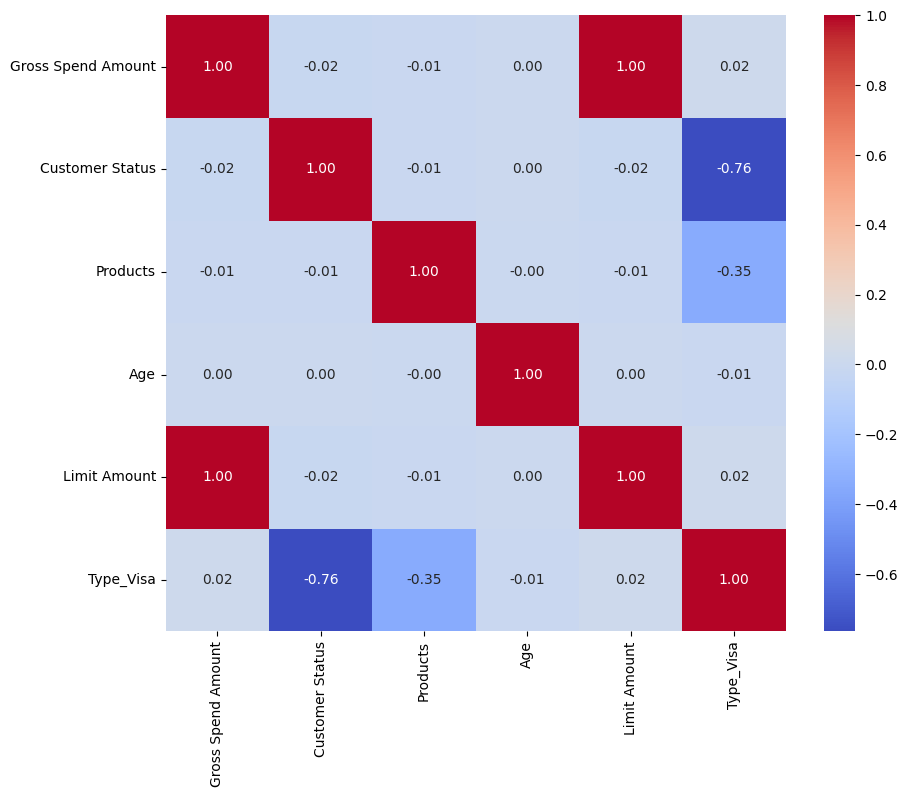

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generates a correlation matrix for numerical columns.
correlation_matrix = scaledDF.corr()


# heatmap of this matrix helps identify relationships between variables. High correlations may indicate potential multicollinearity.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()




In [ ]:
correlation_array = correlation_matrix.values


for i in range(len(correlation_matrix)):
  for j in range(len(correlation_matrix)):
    if(i>=j):
      if(correlation_array[i][j] == 1 and correlation_matrix.columns[i]!=correlation_matrix.columns[j]):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a perfect positive relationship of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'increases proportionally and vice-versa.\n')
      elif(correlation_array[i][j]>= 0.7 and correlation_array[i][j]<=0.99):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a strong positive relationship of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'increases but not perfectly and vice-versa.\n')
      elif(correlation_array[i][j]>= 0.3 and correlation_array[i][j]<=0.69):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a moderate positive relationship of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'increases but with some variability and vice-versa.\n')
      elif(correlation_array[i][j]> 0 and correlation_array[i][j]<=0.29):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a weak positive relationship of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'increases but very slightly and vice-versa.\n')
      elif(correlation_array[i][j]==0):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have no linear relationship  of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'changes,', correlation_matrix.columns[j], 'is not affected and vice-versa.\n')
      elif(correlation_array[i][j]<0 and correlation_array[i][j]>=-0.29 ):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a weak negative relationship  of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'decreases but very slightly and vice-versa.\n')
      elif(correlation_array[i][j]<=-0.3 and correlation_array[i][j]>=-0.69 ):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a moderate negative relationship of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'decreases but with some variability and vice-versa.\n')
      elif(correlation_array[i][j]<=-0.7 and correlation_array[i][j]>=-0.99 ):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a strong negative relationship of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'decreases but not perfectly and vice-versa.\n')
      elif(correlation_array[i][j]==-1 ):
        print(correlation_matrix.columns[i], ' and ', correlation_matrix.columns[j], 'have a perfect negative relationship of',correlation_array[i][j], '. When', correlation_matrix.columns[i], 'increases,', correlation_matrix.columns[j], 'decreases proportionally and vice-versa.\n')

Customer Status  and  Gross Spend Amount have a weak negative relationship  of -0.015230317211453279 . When Customer Status increases, Gross Spend Amount decreases but very slightly and vice-versa.

Products  and  Gross Spend Amount have a weak negative relationship  of -0.008995406642742568 . When Products increases, Gross Spend Amount decreases but very slightly and vice-versa.

Products  and  Customer Status have a weak negative relationship  of -0.010739252043753294 . When Products increases, Customer Status decreases but very slightly and vice-versa.

Age  and  Gross Spend Amount have a weak positive relationship of 0.004284752575782257 . When Age increases, Gross Spend Amount increases but very slightly and vice-versa.

Age  and  Customer Status have a weak positive relationship of 0.0010065612793769007 . When Age increases, Customer Status increases but very slightly and vice-versa.

Age  and  Products have a weak negative relationship  of -0.0043359149573442375 . When Age incre

###Model Training
1. Splitting the dataset into training, and test sets.
2. Training the deep learning model using the training data, adjusting weights and biases to minimize the prediction error (using techniques like backpropagation and optimization algorithms like gradient descent)

In [ ]:
y = unscaledDF['Customer Status'].values
y


array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
x = unscaledDF.iloc[:,[0,2,3,5,6]].values
x


array([[7.034700e+04, 3.000000e+00, 3.300000e+01, 1.055205e+05,
        1.000000e+00],
       [6.724300e+04, 2.000000e+00, 3.900000e+01, 1.008645e+05,
        0.000000e+00],
       [9.096300e+04, 1.000000e+00, 5.100000e+01, 1.364445e+05,
        0.000000e+00],
       ...,
       [3.124000e+04, 3.000000e+00, 4.900000e+01, 4.686000e+04,
        1.000000e+00],
       [7.744400e+04, 2.000000e+00, 5.500000e+01, 1.161660e+05,
        0.000000e+00],
       [5.652500e+04, 3.000000e+00, 5.000000e+01, 8.478750e+04,
        1.000000e+00]])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
#Pass on the functionality to a new variable called sc
sc = StandardScaler()
#Standardize the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.model_selection import GridSearchCV
# from keras.optimizers import Adam

# # Function to create a Keras model
# inputDim = len(x[0])

# def create_model(unitDim=16, optimizer='adam'):
#     model = Sequential()
#     model.add(Dense(units=unitDim, kernel_initializer='he_normal', activation='relu', input_dim=inputDim))
#     model.add(Dense(units=unitDim, kernel_initializer='he_normal', activation='relu'))
#     model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Define hyperparameters to tune and their respective values
# param_grid = {
#     'unitDim': [3,5,16, 32, 64],  # Adjust based on experimentation
#     'batch_size': [64,128, 256],  # Try different batch sizes
#     'epochs': [50, 100,150,200],
#     'optimizer': ['adam', 'rmsprop']  # Add more optimizers to try
# }

# best_accuracy = 0
# best_params = {}

# # Iterate through hyperparameters and train models
# for unitDim in param_grid['unitDim']:
#     for batch_size in param_grid['batch_size']:
#         for epochs in param_grid['epochs']:
#             for optimizer in param_grid['optimizer']:
#                 model = create_model(unitDim=unitDim, optimizer=optimizer)
#                 model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
#                 _, accuracy = model.evaluate(X_test, y_test, verbose=0)
#                 if accuracy > best_accuracy:
#                     best_accuracy = accuracy
#                     best_params = {'unitDim': unitDim, 'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer}

# print("Best Parameters: ", best_params)
# print("Best Accuracy: ", best_accuracy)
print(" After running GridCV we get:\n Best Parameters: 'unitDim': 64, 'batch_size': 128, 'epochs': 150, 'optimizer': 'adam'\n And Best Accuracy:  0.890500009059906")
#

 After running GridCV we get:
 Best Parameters: 'unitDim': 64, 'batch_size': 128, 'epochs': 150, 'optimizer': 'adam'
 AND Best Accuracy:  0.890500009059906


In [ ]:
#Importing the Keras libraries and packages
import keras
#Sequential because the model has all layers in a sequence
from keras.models import Sequential
#Dense implies hidden layers which we cannot access from outside
#These are built in keras functions
from keras.layers import Dense
from keras.optimizers import Adam
#Initialising the deep learning model
classifier = Sequential()
inputDim = len(x[0])
unitDim = 64
#Adding the input layer
#Input_dimensions = 5
#The first hidden layer has 3 units, weights are taken randomly from a uniform distribution and activation is Relu
classifier.add(Dense(units = unitDim, kernel_initializer = 'he_normal', activation = 'relu', input_dim = inputDim))
#Adding the second hidden layer
classifier.add(Dense(units = unitDim, kernel_initializer = 'he_normal' , activation = 'relu'))
#Adding the output layer
#Here the activation function is sigmoid as it is a binary classification problem
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
#Compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting the DNN to the Training set
# Larger batch sizes might provide a more accurate estimate of the gradient, leading to more stable convergence.
classifier.fit(X_train, y_train, batch_size = 128, epochs = 150)


# # Learning rate scheduler function
# def scheduler(epoch, lr):
#     if epoch < 50:
#         return lr
#     else:
#         return lr * keras.backend.exp(-0.1)

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# # Learning rate scheduler callback
# lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

# # Initialising the deep learning model
# classifier = Sequential()

# # Adding the input layer and first hidden layer with dropout
# classifier.add(Dense(units=unitDim, kernel_initializer='he_normal', activation='relu', input_dim=inputDim))
# classifier.add(Dropout(0.5))

# # Adding the second hidden layer with dropout
# classifier.add(Dense(units=unitDim, kernel_initializer='he_normal', activation='relu'))
# classifier.add(Dropout(0.5))

# # Adding the output layer
# classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# # Compiling the DNN
# optimizer = Adam(learning_rate=learning_rate)
# classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# # Fitting the DNN to the Training set
# classifier.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping, lr_scheduler])


Epoch 1/150
63/63 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.7992
Epoch 2/150
63/63 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 0.8734
Epoch 3/150
63/63 [==============================] - 0s 6ms/step - loss: 0.1908 - accuracy: 0.8724
Epoch 4/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.8765
Epoch 5/150
63/63 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 0.8807
Epoch 6/150
63/63 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 0.8789
Epoch 7/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.8775
Epoch 8/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.8780
Epoch 9/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.8746
Epoch 10/150
63/63 [==============================] - 0s 4ms/step - loss: 0.1789 - accuracy: 0.8769
Epoch 11/

In [ ]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
i = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
accuracy = []
for cutoff in i:
  y_pred = (classifier.predict(X_test) > cutoff)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

index_of_number = accuracy.index(max(accuracy))
m = i[index_of_number]

63/63 [==============================] - 0s 992us/step


###Model Evaluation
Evaluating the model's performance on the validation set using appropriate metrics like accuracy, precision, recall, F1-score, ROC-AUC, etc

63/63 [==============================] - 0s 1ms/step
Accuracy 0.89 

Therefore our neural network is 89.0 % accurate at detecting fraud and non fraud customers given the data provided to us.


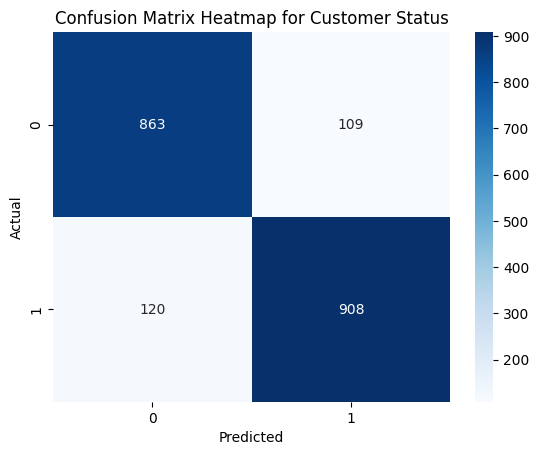

In [ ]:
import seaborn as sns
from sklearn import metrics
y_pred = classifier.predict(X_test)
y_pred = (y_pred > m)
accu = metrics.accuracy_score(y_test, y_pred)
accu = round(metrics.accuracy_score(y_test, y_pred),2)
accu_perc = accu*100
print('Accuracy', accu,'\n')
print('Therefore our neural network is', accu_perc, '% accurate at detecting fraud and non fraud customers given the data provided to us.')
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot = True, fmt='')


# Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Customer Status')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Analyze confusion matrix values
true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]
# # total = true_positive+true_negative+false_positive+false_negative
# print(total)
test_total = len(X_test)
# Generate textual summary based on confusion matrix values
summary=''

if true_positive > 0:
    summary += f"{true_positive} out of {test_total} samples correctly predicted as fraud.\n"
if true_negative > 0:
    summary += f"{true_negative}  out of {test_total} samples correctly predicted as non-fraud.\n"
if false_positive > 0:
    summary += f"{false_positive}  out of {test_total} samples incorrectly predicted as fraud.\n"
if false_negative > 0:
    summary += f"{false_negative}  out of {test_total} samples incorrectly predicted as non-fraud.\n"

print("Heatmap Analysis Summary:")
print(summary)
precision_score = true_positive/ (true_positive + false_positive)
recall_score = true_positive/ (true_positive + false_negative)
F1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)

print("Precision of our neural netwrok is", precision_score)
print("F1 score(a harmonic mean of precision and recall, giving a balanced evaluation of the model's performance on both classes) of our neural netwrok is", F1_score)

print("Recall score (Recall measures the proportion of actual positives that are correctly predicted by the model) of our neural network is",recall_score)


Heatmap Analysis Summary:
908 out of 2000 samples correctly predicted as fraud.
863  out of 2000 samples correctly predicted as non-fraud.
109  out of 2000 samples incorrectly predicted as fraud.
120  out of 2000 samples incorrectly predicted as non-fraud.

Precision of our neural netwrok is 0.8928220255653884
F1 score(a harmonic mean of precision and recall, giving a balanced evaluation of the model's performance on both classes) of our neural netwrok is 0.8880195599022006
Recall score (Recall measures the proportion of actual positives that are correctly predicted by the model) of our neural network is 0.8832684824902723


250/250 [==============================] - 0s 949us/step
ROC AUC Score on Training Set: 0.8926765559533228
ROC AUC Score on Test Set: 0.8855642823973995


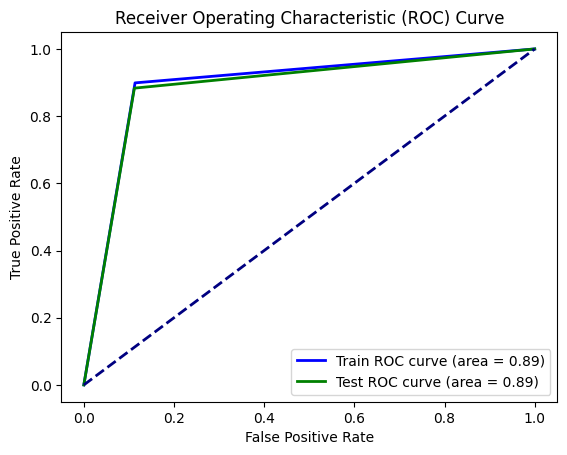

ROC-AUC score of 0.8926765559533228 indicates a high-performing model with strong classification capabilities. 
 It means that there's an 89.26765559533229 % chance that the model will correctly distinguish 
 between a randomly chosen positive instance  and a randomly chosen negative instance.


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting probabilities for the test set
y_pred_test_probs = classifier.predict(X_test)

# For binary classification, you might want to convert these probabilities to class labels
y_pred_test = (y_pred_test_probs > 0.5).astype("int32")

# Predicting probabilities for the training set
y_pred_train_probs = classifier.predict(X_train)

# For binary classification
y_pred_train = (y_pred_train_probs > 0.5).astype("int32")


# Calculate ROC AUC Score
roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Print the scores
print("ROC AUC Score on Training Set:", roc_auc_train)
print("ROC AUC Score on Test Set:", roc_auc_test)

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"ROC-AUC score of {roc_auc_train} indicates a high-performing model with strong classification capabilities. \n It means that there's an {roc_auc_train*100} % chance that the model will correctly distinguish \n between a randomly chosen positive instance  and a randomly chosen negative instance.")